In [284]:
import numpy as np
import numpy.random as r
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [285]:
df = pd.read_csv("hotel_bookings.csv")
# df = df.dropna()
N = df.shape[0]
k = df.shape[1]
df.shape

(119390, 32)

In [286]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [287]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [288]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [289]:
# Create scaler and encoder
scaler = StandardScaler()
enc = OneHotEncoder(handle_unknown='ignore')

In [290]:
# Set target y
y = np.array(df.is_canceled).reshape(N,1)

y.shape


(119390, 1)

In [291]:
# define the one-hot encoding function
def to_onehot(arr):
    arr = np.array(arr)
    if len(arr.shape) == 1:
        arr = arr.reshape(arr.shape[0],1)
    return enc.fit_transform(arr).toarray()

to_onehot(df.hotel)

# define df to np array function
def to_nparray(arr):
    arr = np.array(arr)
    if len(arr.shape) == 1:
        arr = arr.reshape(arr.shape[0],1)
    return arr

In [292]:
X_room_match = (df.reserved_room_type == df.assigned_room_type)-0
np.array(X_room_match)

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [293]:
# Create X by processing each column and combine

# hotel: one-hot
X_hotel = to_onehot(df.hotel)

# is_canceled: use as y

# lead_time: No change
X_lead_time = to_nparray(df.lead_time)

# *arrival_date_year: one-hot/discard
    #X_arrival_date_year = to_onehot(df.arrival_date_year)

# *arrival_date_month: one-hot/discard
    #X_arrival_date_month = to_onehot(df.arrival_date_month)

# *arrival_date_week_number: No change/discard
    #X_arrival_date_week_number = to_nparray(df.arrival_date_week_number)

# *arrival_date_day_of_month: discard
# Because by looking at the data, the distribution is very average;
# If using numbers directly, it adds relationships of sizes which is not the real case;
# If transform to one-hot, it adds to many features (sparse of 31 features).

# stays_in_weekend_nights: No change
# + stays_in_week_nights: No change
# + adults: No change
# + children: No change
# + babies: No change
X_5features = to_nparray(df[['stays_in_weekend_nights','stays_in_week_nights','adults','children','babies']])

# meal: one-hot
X_meal = to_onehot(df.meal)

# *country: one-hot/discard
#X_country = to_onehot(df.country)

# market_segment: one-hot
X_market_segment = to_onehot(df.market_segment)

# distribution_channel: one-hot
X_distribution_channel = to_onehot(df.distribution_channel)

# is_repeated_guest: No change
# previous_cancellations: No change
# previous_bookings_not_canceled: No change
X_3features = to_nparray(df[['is_repeated_guest','previous_cancellations','previous_bookings_not_canceled']])

# *reserved_room_type: one-hot
# *assigned_room_type: one-hot
# This two would add too many features, so combine
# room_match: bool -> int
    #X_reserved_room_type = to_onehot(df.reserved_room_type)
    #X_assigned_room_type = to_onehot(df.assigned_room_type)
X_room_match = np.array((df.reserved_room_type == df.assigned_room_type) - 0)
X_room_match = X_room_match.reshape(X_room_match.shape[0],1)

# booking_changes: No change
X_booking_changes = to_nparray(df.booking_changes)

# deposit_type: one-hot
X_deposit_type = to_onehot(df.deposit_type)

# agent: one-hot/discard
    #X_agent = to_onehot(df.agent)

# *company: one-hot/discard, too many null
    #X_company = to_onehot(df.company)

# days_in_waiting_list: No change
X_days_in_waiting_list = to_nparray(df.days_in_waiting_list)

# customer_type: one-hot
X_customer_type = to_onehot(df.customer_type)

# adr: No change
# required_car_parking_spaces: No change
# total_of_special_requests: No change
X_3f2 = to_nparray(df[['adr','required_car_parking_spaces','total_of_special_requests']])

# reservation_status: discard
# reservation_status_date: discard



In [294]:
features_use = (X_hotel, X_lead_time, X_5features, X_meal, X_market_segment, X_distribution_channel, X_3features,
                X_room_match, X_booking_changes, X_deposit_type, X_days_in_waiting_list, X_customer_type, X_3f2)

X = np.hstack(features_use)
X = scaler.fit_transform(X) # do scaling before train_test_split
X.shape

(119390, 42)

In [295]:
df_cleaned = pd.DataFrame(X)
df_cleaned.to_csv("cleaned_data.csv")

# ***注意！***
# 这里输出的csv file第一列会有index，如果重新read_csv读进来的话，第一列index会作为数据读进来，
# 所以输出之后可能需要excel里手动删除第一列再用，或者读进来之后再drop第一列


In [296]:
yX = np.hstack((y,X))
df_yX = pd.DataFrame(yX)
df_yX = df_yX.dropna()

y2 = df_yX[0]
X2 = df_yX.drop([0],axis = 1)
y = np.array(y2).reshape(y2.shape[0],1)
X = np.array(X2)

## Logistic Regression

In [297]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# With no penalty term

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)#default is 1/4 test


In [299]:
acc_train_none = []
acc_test_none = []

In [300]:
def logistic_nopenalty(X_train, X_test, y_train, y_test):
    logreg = linear_model.LogisticRegression(solver = 'saga', penalty='none')
    logreg.fit(X_train, y_train)
    acc_train_none = logreg.score(X_train, y_train) #calculate the accuracy for training set
    acc_test_none = logreg.score(X_test, y_test) #calculate the accuracy for testing set
    print("Accuracy for training data is:", acc_train_none)
    print("Accuracy for testing data is:", acc_test_none)
    return acc_train_none,acc_test_none

In [301]:
acc_train_none, acc_test_none = logistic_nopenalty(X_train, X_test, y_train, y_test)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy for training data is: 0.8158232725404573
Accuracy for testing data is: 0.8115388481254397


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


# L1 regularization

In [302]:
c_val = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
acc_train_L1 = []
acc_test_L1 = []

In [303]:
def logistic_L1(c_val, X_train, X_test, y_train, y_test):
    logreg = linear_model.LogisticRegression(C = c_val, solver = 'saga', penalty='l1')
    logreg.fit(X_train, y_train)
    accuracy_train=logreg.score(X_train, y_train) #calculate the accuracy for training set
    acc_train_L1.append(accuracy_train)
    accuracy_test = logreg.score(X_test, y_test) #calculate the accuracy for testing set
    acc_test_L1.append(accuracy_test)
    print("For C = ", c_val)
    print("Accuracy for training data is:", accuracy_train)
    print("Accuracy for testing data is:", accuracy_test)
    return acc_train_L1,acc_test_L1

In [304]:
for c in c_val:
    acc_train_L1,acc_test_L1 = logistic_L1(c, X_train, X_test, y_train, y_test)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.0001
Accuracy for training data is: 0.7524989110890227
Accuracy for testing data is: 0.7434247998123764


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.001
Accuracy for training data is: 0.7954187560727728
Accuracy for testing data is: 0.7882199216001609


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.01
Accuracy for training data is: 0.8158344408581736
Accuracy for testing data is: 0.8117733775588837


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.1
Accuracy for training data is: 0.8160578072124995
Accuracy for testing data is: 0.8119744027875498


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  1
Accuracy for training data is: 0.8158456091758899
Accuracy for testing data is: 0.8115388481254397


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  10
Accuracy for training data is: 0.8158232725404573
Accuracy for testing data is: 0.8115388481254397


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  100
Accuracy for training data is: 0.8158232725404573
Accuracy for testing data is: 0.8115388481254397
For C =  1000
Accuracy for training data is: 0.8158232725404573
Accuracy for testing data is: 0.8115388481254397


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


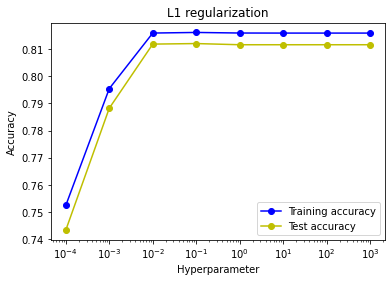

In [306]:
plt.title("L1 regularization")
plt.xlabel("Hyperparameter")
plt.ylabel("Accuracy")
plt.xscale("log")
plt.plot(c_val, acc_train_L1, 'bo-', label = "Training accuracy")
plt.plot(c_val, acc_test_L1, 'yo-',label='Test accuracy')
plt.legend()
plt.show()

# L1 regularization with polynomial feature transformation



In [312]:
from sklearn.preprocessing import PolynomialFeatures

In [313]:
poly = PolynomialFeatures()
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

In [314]:
acc_train_poly_L1 = []
acc_test_poly_L1 = []
acc_train_L1 = []
acc_test_L1 = []
for c in c_val:
    acc_train_poly_L1,acc_test_poly_L1 = logistic_L1(c, X_poly_train, X_poly_test, y_train, y_test)
print(acc_train_poly_L1)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.0001
Accuracy for training data is: 0.7496509900713656
Accuracy for testing data is: 0.7406774550206051


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.001
Accuracy for training data is: 0.7496509900713656
Accuracy for testing data is: 0.7414815559352699


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.01
Accuracy for training data is: 0.7497515049308122
Accuracy for testing data is: 0.7415150601400475


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.1
Accuracy for training data is: 0.7497179999776634
Accuracy for testing data is: 0.7415150601400475


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  1
Accuracy for training data is: 0.7497179999776634
Accuracy for testing data is: 0.7415150601400475


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  10
Accuracy for training data is: 0.7497179999776634
Accuracy for testing data is: 0.7415150601400475


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  100
Accuracy for training data is: 0.7497179999776634
Accuracy for testing data is: 0.7415150601400475
For C =  1000
Accuracy for training data is: 0.7497179999776634
Accuracy for testing data is: 0.7415150601400475
[0.7496509900713656, 0.7496509900713656, 0.7497515049308122, 0.7497179999776634, 0.7497179999776634, 0.7497179999776634, 0.7497179999776634, 0.7497179999776634]


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


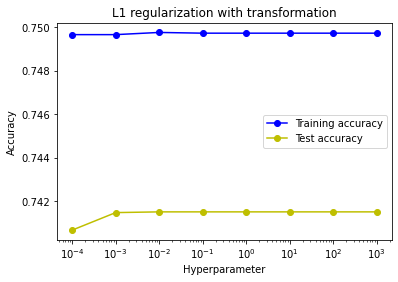

In [315]:
plt.title("L1 regularization with transformation")
plt.xlabel("Hyperparameter")
plt.ylabel("Accuracy")
plt.xscale("log")
plt.plot(c_val, acc_train_poly_L1, 'bo-', label = "Training accuracy")
plt.plot(c_val, acc_test_poly_L1, 'yo-',label='Test accuracy')
plt.legend()
plt.show()

# L2 Regularization

In [307]:
acc_train_L2 = []
acc_test_L2 = []

In [308]:
def logistic_L2(c_val, X_train, X_test, y_train, y_test): 
    logreg = linear_model.LogisticRegression(C = c_val, solver = 'saga', penalty='l2')
    logreg.fit(X_train, y_train)
    accuracy_train=logreg.score(X_train, y_train) #calculate the accuracy for training set
    acc_train_L2.append(accuracy_train)
    accuracy_test = logreg.score(X_test, y_test) #calculate the accuracy for testing set
    acc_test_L2.append(accuracy_test)
    print("For C = ", c_val)
    print("Accuracy for training data is:", accuracy_train)
    print("Accuracy for testing data is:", accuracy_test)
    return acc_train_L2,acc_test_L2

In [309]:
for c in c_val:
    acc_train_L2,acc_test_L2 = logistic_L2(c, X_train, X_test, y_train, y_test)
    

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.0001
Accuracy for training data is: 0.784384458169066
Accuracy for testing data is: 0.7776996012999632


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.001
Accuracy for training data is: 0.8091111135929595
Accuracy for testing data is: 0.8049050155794553


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.01
Accuracy for training data is: 0.8149856487117345
Accuracy for testing data is: 0.8109692766442188


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.1
Accuracy for training data is: 0.815812104222741
Accuracy for testing data is: 0.8116728649445505


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  1
Accuracy for training data is: 0.8158232725404573
Accuracy for testing data is: 0.8115388481254397


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  10
Accuracy for training data is: 0.8158232725404573
Accuracy for testing data is: 0.8115388481254397


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  100
Accuracy for training data is: 0.8158232725404573
Accuracy for testing data is: 0.8115388481254397
For C =  1000
Accuracy for training data is: 0.8158232725404573
Accuracy for testing data is: 0.8115388481254397


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


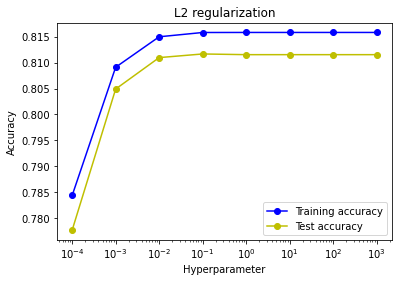

In [311]:
plt.title("L2 regularization")
plt.xlabel("Hyperparameter")
plt.ylabel("Accuracy")
plt.xscale("log")
plt.plot(c_val, acc_train_L2, 'bo-', label = "Training accuracy")
plt.plot(c_val, acc_test_L2, 'yo-',label='Test accuracy')
plt.legend()
plt.show()


# L2 regularization with polynomial feature transformation





In [316]:
acc_train_poly_L2 = []
acc_test_poly_L2 = []
acc_train_L2 = []
acc_test_L2 = []

In [317]:
for c in c_val:
    acc_train_poly_L2,acc_test_poly_L2 = logistic_L2(c, X_poly_train, X_poly_test, y_train, y_test)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.0001
Accuracy for training data is: 0.7497179999776634
Accuracy for testing data is: 0.7415150601400475


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.001
Accuracy for training data is: 0.7497179999776634
Accuracy for testing data is: 0.7415150601400475


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.01
Accuracy for training data is: 0.7497179999776634
Accuracy for testing data is: 0.7415150601400475


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.1
Accuracy for training data is: 0.7497179999776634
Accuracy for testing data is: 0.7415150601400475


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  1
Accuracy for training data is: 0.7497179999776634
Accuracy for testing data is: 0.7415150601400475


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  10
Accuracy for training data is: 0.7497179999776634
Accuracy for testing data is: 0.7415150601400475


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  100
Accuracy for training data is: 0.7497179999776634
Accuracy for testing data is: 0.7415150601400475
For C =  1000
Accuracy for training data is: 0.7497179999776634
Accuracy for testing data is: 0.7415150601400475


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


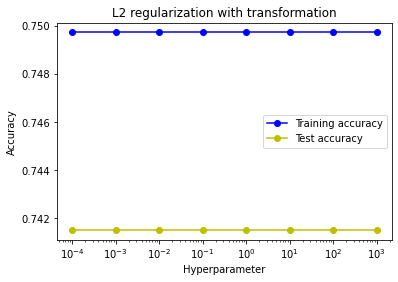

In [319]:
plt.title("L2 regularization with transformation")
plt.xlabel("Hyperparameter")
plt.ylabel("Accuracy")
plt.xscale("log")
plt.plot(c_val, acc_train_poly_L2, 'bo-', label = "Training accuracy")
plt.plot(c_val, acc_test_poly_L2, 'yo-',label='Test accuracy')
plt.legend()
plt.show()

## SVM

# Linear Kernel

In [254]:
from sklearn import svm
import random

X1, X2, y1, y2 = train_test_split(X, y, test_size=0.015)
X2.shape
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=0)#default is 1/4 test


In [272]:
acc_train_linear = []
acc_test_linear = []
c_val = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
# y = y*2-1
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)#default is 1/4 test
# y_train

In [273]:
def svm_linear(c_val,X_train, y_train, X_test, y_test):
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c_val)
    svc_linear.fit(X_train, y_train)
    accuracy_train = svc_linear.score(X_train, y_train)
    accuracy_test = svc_linear.score(X_test,y_test)
    acc_train_linear.append(accuracy_train)
    acc_test_linear.append(accuracy_test)
    print("For C = ", c_val)
    print("Accuracy for training data is:", accuracy_train)
    print("Accuracy for testing data is:", accuracy_test)
    return acc_train_linear, acc_test_linear

In [274]:
for c in c_val:
    acc_train_linear, acc_test_linear = svm_linear(c, X_train, y_train, X_test, y_test)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.0001
Accuracy for training data is: 0.6492926284437825
Accuracy for testing data is: 0.6227678571428571
For C =  0.001
Accuracy for training data is: 0.7736411020104245
Accuracy for testing data is: 0.7410714285714286
For C =  0.01
Accuracy for training data is: 0.774385703648548
Accuracy for testing data is: 0.7410714285714286


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.1
Accuracy for training data is: 0.7900223380491437
Accuracy for testing data is: 0.7544642857142857
For C =  1
Accuracy for training data is: 0.7900223380491437
Accuracy for testing data is: 0.7522321428571429


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  10
Accuracy for training data is: 0.7900223380491437
Accuracy for testing data is: 0.7522321428571429
For C =  100
Accuracy for training data is: 0.7900223380491437
Accuracy for testing data is: 0.75


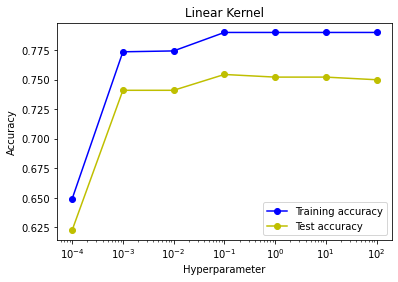

In [275]:
plt.title("Linear Kernel")
plt.xlabel("Hyperparameter")
plt.ylabel("Accuracy")
plt.xscale("log")


plt.plot(c_val, acc_train_linear, 'bo-', label = "Training accuracy")
plt.plot(c_val, acc_test_linear, 'yo-', label = 'Test accuracy')
plt.legend()
plt.show()


# Polynomial Kernel

In [276]:
acc_train_polynomial = []
acc_test_polynomial = []

In [277]:
def svm_polynomial(c_val,X_train, y_train, X_test, y_test):
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c_val)
    svc_polynomial.fit(X_train, y_train)
    accuracy_train = svc_polynomial.score(X_train, y_train)
    accuracy_test = svc_polynomial.score(X_test,y_test)
    acc_train_polynomial.append(accuracy_train)
    acc_test_polynomial.append(accuracy_test)
    print("For C = ", c_val)
    print("Accuracy for training data is:", accuracy_train)
    print("Accuracy for testing data is:", accuracy_test)
    return acc_train_polynomial, acc_test_polynomial

In [278]:
for c in c_val:
    acc_train_polynomial, acc_test_polynomial = svm_polynomial(c, X_train, y_train, X_test, y_test)
    

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.0001
Accuracy for training data is: 0.6500372300819062
Accuracy for testing data is: 0.625
For C =  0.001
Accuracy for training data is: 0.6507818317200298
Accuracy for testing data is: 0.625


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.01
Accuracy for training data is: 0.6545048399106478
Accuracy for testing data is: 0.6272321428571429
For C =  0.1
Accuracy for training data is: 0.7818317200297841
Accuracy for testing data is: 0.7455357142857143


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  1
Accuracy for training data is: 0.8056589724497394
Accuracy for testing data is: 0.7589285714285714
For C =  10
Accuracy for training data is: 0.8600148920327625
Accuracy for testing data is: 0.7566964285714286
For C =  100
Accuracy for training data is: 0.9233060312732688
Accuracy for testing data is: 0.7700892857142857


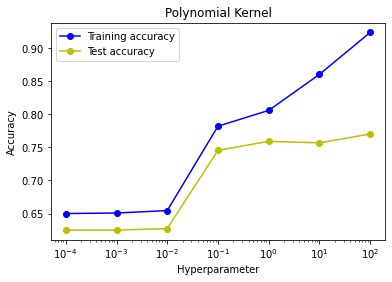

In [279]:
plt.title("Polynomial Kernel")
plt.xlabel("Hyperparameter")
plt.ylabel("Accuracy")
plt.xscale("log")


plt.plot(c_val, acc_train_polynomial, 'bo-', label = "Training accuracy")
plt.plot(c_val, acc_test_polynomial, 'yo-', label = 'Test accuracy')
plt.legend()
plt.show()


# Radial-Basis Function Kernel

In [280]:
acc_train_RBF = []
acc_test_RBF = []

In [281]:
def svm_polynomial(c_val,X_train, y_train, X_test, y_test):
    svc_RBF = svm.SVC(probability = False, kernel = 'rbf', C = c_val)
    svc_RBF.fit(X_train, y_train)
    accuracy_train = svc_RBF.score(X_train, y_train)
    accuracy_test = svc_RBF.score(X_test,y_test)
    acc_train_RBF.append(accuracy_train)
    acc_test_RBF.append(accuracy_test)
    print("For C = ", c_val)
    print("Accuracy for training data is:", accuracy_train)
    print("Accuracy for testing data is:", accuracy_test)
    return acc_train_RBF, acc_test_RBF

In [282]:
for c in c_val:
    acc_train_RBF, acc_test_RBF = svm_polynomial(c, X_train, y_train, X_test, y_test)
    

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.0001
Accuracy for training data is: 0.6492926284437825
Accuracy for testing data is: 0.6227678571428571


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.001
Accuracy for training data is: 0.6492926284437825
Accuracy for testing data is: 0.6227678571428571


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.01
Accuracy for training data is: 0.6492926284437825
Accuracy for testing data is: 0.6227678571428571


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  0.1
Accuracy for training data is: 0.7691734921816828
Accuracy for testing data is: 0.7321428571428571


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  1
Accuracy for training data is: 0.8257632166790767
Accuracy for testing data is: 0.7745535714285714


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  10
Accuracy for training data is: 0.8875651526433358
Accuracy for testing data is: 0.7879464285714286


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For C =  100
Accuracy for training data is: 0.9270290394638868
Accuracy for testing data is: 0.78125


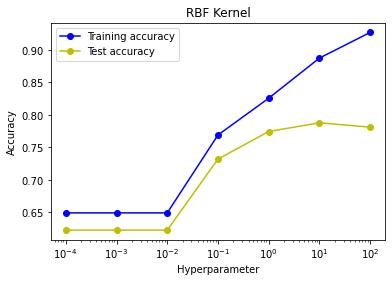

In [283]:
plt.title("RBF Kernel")
plt.xlabel("Hyperparameter")
plt.ylabel("Accuracy")
plt.xscale("log")


plt.plot(c_val, acc_train_RBF, 'bo-', label = "Training accuracy")
plt.plot(c_val, acc_test_RBF, 'yo-', label = 'Test accuracy')
plt.legend()
plt.show()
